In [49]:
%matplotlib inline

import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns
import pingouin as pg

from matplotlib import rcParams
rcParams['figure.figsize'] = 15,6

from src import data, paths,labels,centroids
!date -I

2024-05-13


In [50]:
mapping = pd.read_csv(data.path('interim/DICE_Glasser_Yeo17_Schaefer200_labelMapping.csv'),index_col=0)
mapping

,regionName,Yeo17,Schaefer200,regionLongName,regionIdLabel,LR,region,Lobe,cortex,regionID,Cortex_ID,x-cog,y-cog,z-cog,volmm
0,V1_L,2_Visual_B,7Networks_LH_Vis_10,Primary_Visual_Cortex_L,1_L,L,V1,Occ,Primary_Visual,1,1,100.491589,41.138901,71.637040,6717
1,V6_L,2_Visual_B,7Networks_LH_Vis_12,Sixth_Visual_Area_L,3_L,L,V6,Occ,Dorsal_Stream_Visual,3,3,104.543112,44.481665,103.916749,1009
2,V2_L,2_Visual_B,7Networks_LH_Vis_13,Second_Visual_Area_L,4_L,L,V2,Occ,Early_Visual,4,2,102.236656,44.064791,74.401125,6220
3,V3_L,1_Visual_A,7Networks_LH_Vis_13,Third_Visual_Area_L,5_L,L,V3,Occ,Early_Visual,5,2,107.926111,40.632159,76.961153,4994
4,V4_L,1_Visual_A,7Networks_LH_Vis_2,Fourth_Visual_Area_L,6_L,L,V4,Occ,Early_Visual,6,2,120.481621,41.344329,69.955702,3183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,FOP2_R,4_Somatomotor_B,7Networks_RH_SomMot_3,Frontal_Opercular_Area_2_R,315_R,R,FOP2,Ins,Insular_and_Frontal_Opercular,315,12,49.524038,122.612981,86.716346,416
356,PoI1_R,7_Dorsal_Attention_B,7Networks_RH_SalVentAttn_FrOperIns_2,Area_Posterior_Insular_1_R,367_R,R,PoI1,Ins,Insular_and_Frontal_Opercular,367,12,52.456420,115.341143,68.178069,1067
357,Ig_R,4_Somatomotor_B,7Networks_RH_SomMot_3,Insular_Granular_Complex_R,368_R,R,Ig,Ins,Insular_and_Frontal_Opercular,368,12,54.984127,112.083900,86.482993,441
358,FOP5_R,8_Salience+Ventral_Attention_A,7Networks_RH_SalVentAttn_FrOperIns_3,Area_Frontal_Opercular_5_R,369_R,R,FOP5,Ins,Insular_and_Frontal_Opercular,369,12,53.738178,153.878893,75.189158,867


In [51]:
mapping_glasser_schaefer = mapping[["regionName","Schaefer200"]]
mapping_glasser_schaefer

,regionName,Schaefer200
0,V1_L,7Networks_LH_Vis_10
1,V6_L,7Networks_LH_Vis_12
2,V2_L,7Networks_LH_Vis_13
3,V3_L,7Networks_LH_Vis_13
4,V4_L,7Networks_LH_Vis_2
...,...,...
355,FOP2_R,7Networks_RH_SomMot_3
356,PoI1_R,7Networks_RH_SalVentAttn_FrOperIns_2
357,Ig_R,7Networks_RH_SomMot_3
358,FOP5_R,7Networks_RH_SalVentAttn_FrOperIns_3


In [52]:
glasser_centroids = mapping[["regionName","x-cog","y-cog","z-cog"]].copy()
glasser_centroids

,regionName,x-cog,y-cog,z-cog
0,V1_L,100.491589,41.138901,71.637040
1,V6_L,104.543112,44.481665,103.916749
2,V2_L,102.236656,44.064791,74.401125
3,V3_L,107.926111,40.632159,76.961153
4,V4_L,120.481621,41.344329,69.955702
...,...,...,...,...
355,FOP2_R,49.524038,122.612981,86.716346
356,PoI1_R,52.456420,115.341143,68.178069
357,Ig_R,54.984127,112.083900,86.482993
358,FOP5_R,53.738178,153.878893,75.189158


In [53]:
glasser_centroids['color'] = glasser_centroids["regionName"].apply(lambda x: 'r' if x == "4_L" else 'b')

In [54]:
minimum = glasser_centroids[["x-cog","y-cog","z-cog"]].min(axis=None)
maximum = glasser_centroids[["x-cog","y-cog","z-cog"]].max(axis=None)

for c in ["x-cog","y-cog","z-cog"]:
    glasser_centroids[c+"_s"] = (glasser_centroids[c]-glasser_centroids[c].min()) / (maximum-minimum)
glasser_centroids

,regionName,x-cog,y-cog,z-cog,color,x-cog_s,y-cog_s,z-cog_s
0,V1_L,100.491589,41.138901,71.637040,b,0.445702,0.044836,0.273458
1,V6_L,104.543112,44.481665,103.916749,b,0.469788,0.064708,0.465359
2,V2_L,102.236656,44.064791,74.401125,b,0.456077,0.062230,0.289890
3,V3_L,107.926111,40.632159,76.961153,b,0.489900,0.041823,0.305109
4,V4_L,120.481621,41.344329,69.955702,b,0.564542,0.046057,0.263462
...,...,...,...,...,...,...,...,...
355,FOP2_R,49.524038,122.612981,86.716346,b,0.142704,0.529194,0.363103
356,PoI1_R,52.456420,115.341143,68.178069,b,0.160136,0.485963,0.252894
357,Ig_R,54.984127,112.083900,86.482993,b,0.175163,0.466599,0.361716
358,FOP5_R,53.738178,153.878893,75.189158,b,0.167756,0.715068,0.294575


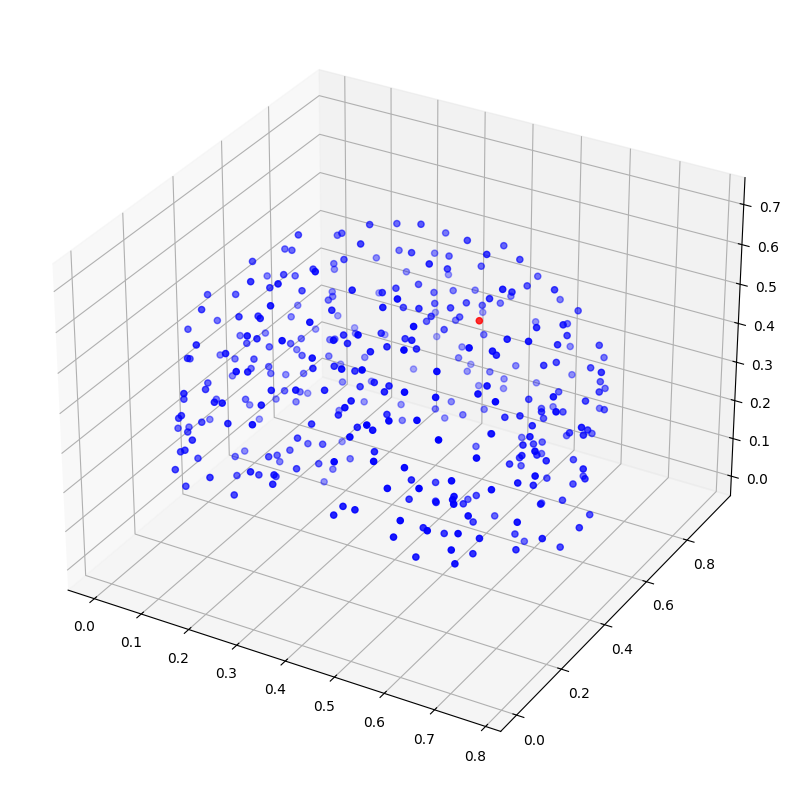

In [55]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(glasser_centroids["x-cog_s"], glasser_centroids["y-cog_s"], glasser_centroids["z-cog_s"],c=glasser_centroids["color"])
plt.show()

In [56]:
schaefer_centroids = pd.read_csv(data.path('external/schaefer_parcellation_centroids/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_2mm.Centroid_RAS.csv'),index_col=0)
schaefer_centroids

,ROI Name,R,A,S
ROI Label,,,,
1,7Networks_LH_Vis_1,-24,-54,-10
2,7Networks_LH_Vis_2,-26,-78,-14
3,7Networks_LH_Vis_3,-46,-70,-8
4,7Networks_LH_Vis_4,-10,-68,-4
5,7Networks_LH_Vis_5,-26,-96,-12
...,...,...,...,...
196,7Networks_RH_Default_PFCdPFCm_6,28,30,42
197,7Networks_RH_Default_PFCdPFCm_7,24,24,54
198,7Networks_RH_Default_pCunPCC_1,12,-54,14


In [57]:
minimum = schaefer_centroids[["R","A","S"]].min(axis=None)
maximum = schaefer_centroids[["R","A","S"]].max(axis=None)

for c in ["R","A","S"]:
    schaefer_centroids[c+"_s"] = (schaefer_centroids[c]-schaefer_centroids[c].min()) / (maximum-minimum)
schaefer_centroids

,ROI Name,R,A,S,R_s,A_s,S_s
ROI Label,,,,,,,
1,7Networks_LH_Vis_1,-24,-54,-10,0.228916,0.253012,0.180723
2,7Networks_LH_Vis_2,-26,-78,-14,0.216867,0.108434,0.156627
3,7Networks_LH_Vis_3,-46,-70,-8,0.096386,0.156627,0.192771
4,7Networks_LH_Vis_4,-10,-68,-4,0.313253,0.168675,0.216867
5,7Networks_LH_Vis_5,-26,-96,-12,0.216867,0.000000,0.168675
...,...,...,...,...,...,...,...
196,7Networks_RH_Default_PFCdPFCm_6,28,30,42,0.542169,0.759036,0.493976
197,7Networks_RH_Default_PFCdPFCm_7,24,24,54,0.518072,0.722892,0.566265
198,7Networks_RH_Default_pCunPCC_1,12,-54,14,0.445783,0.253012,0.325301


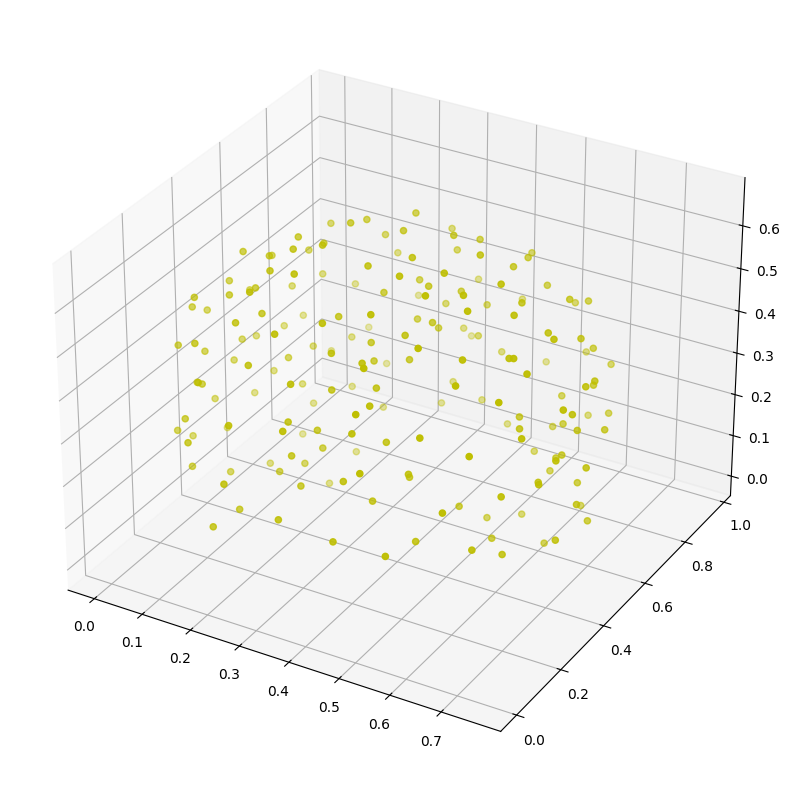

In [58]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(schaefer_centroids["R_s"], schaefer_centroids["A_s"], schaefer_centroids["S_s"],c="y")
plt.show()

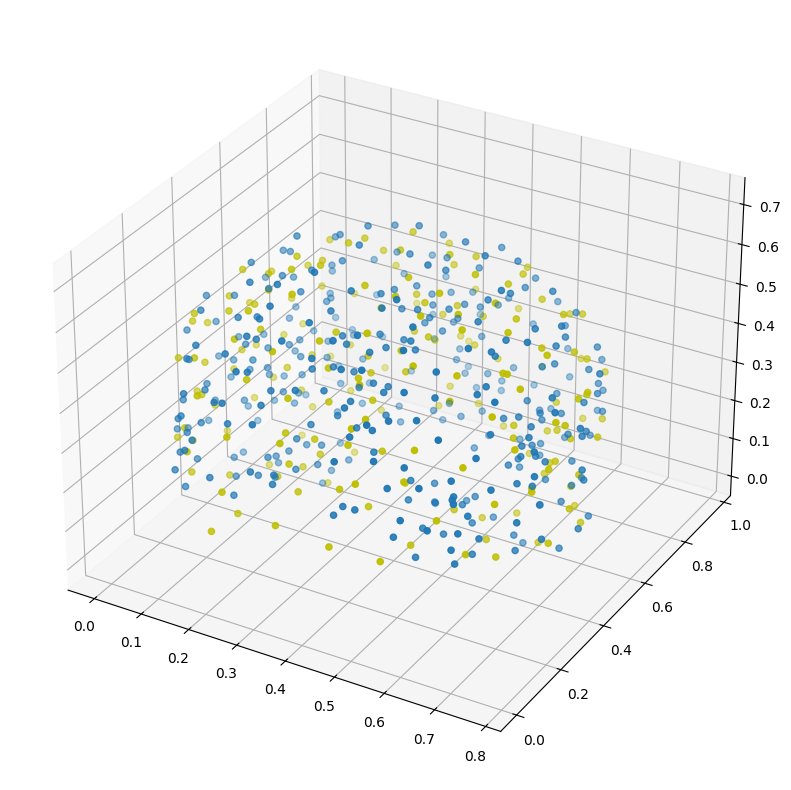

In [59]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(glasser_centroids["x-cog_s"], glasser_centroids["y-cog_s"], glasser_centroids["z-cog_s"])
ax.scatter(schaefer_centroids["R_s"], schaefer_centroids["A_s"], schaefer_centroids["S_s"],c="y")
plt.show()

In [60]:
mapping_coordinates = pd.merge(mapping_glasser_schaefer,glasser_centroids,on="regionName")
mapping_coordinates = pd.merge(mapping_coordinates,schaefer_centroids,left_on="Schaefer200",right_on="ROI Name")
mapping_coordinates

,regionName,Schaefer200,x-cog,y-cog,z-cog,color,x-cog_s,y-cog_s,z-cog_s,ROI Name,R,A,S,R_s,A_s,S_s
0,V1_L,7Networks_LH_Vis_10,100.491589,41.138901,71.637040,b,0.445702,0.044836,0.273458,7Networks_LH_Vis_10,-12,-70,8,0.301205,0.156627,0.289157
1,V6_L,7Networks_LH_Vis_12,104.543112,44.481665,103.916749,b,0.469788,0.064708,0.465359,7Networks_LH_Vis_12,-12,-72,22,0.301205,0.144578,0.373494
2,DVT_L,7Networks_LH_Vis_12,108.042324,53.086307,103.566805,b,0.490591,0.115862,0.463278,7Networks_LH_Vis_12,-12,-72,22,0.301205,0.144578,0.373494
3,V2_L,7Networks_LH_Vis_13,102.236656,44.064791,74.401125,b,0.456077,0.062230,0.289890,7Networks_LH_Vis_13,-6,-88,28,0.337349,0.048193,0.409639
4,V3_L,7Networks_LH_Vis_13,107.926111,40.632159,76.961153,b,0.489900,0.041823,0.305109,7Networks_LH_Vis_13,-6,-88,28,0.337349,0.048193,0.409639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,Pir_R,7Networks_RH_SalVentAttn_FrOperIns_1,57.555081,133.362084,52.703672,b,0.190448,0.593097,0.160900,7Networks_RH_SalVentAttn_FrOperIns_1,40,6,-16,0.614458,0.614458,0.144578
356,PI_R,7Networks_RH_SalVentAttn_FrOperIns_1,47.013363,123.157016,57.926503,b,0.127778,0.532428,0.191950,7Networks_RH_SalVentAttn_FrOperIns_1,40,6,-16,0.614458,0.614458,0.144578
357,AVI_R,7Networks_RH_Cont_PFCv_1,58.445161,150.959140,67.720430,b,0.195739,0.697710,0.250174,7Networks_RH_Cont_PFCv_1,34,22,-8,0.578313,0.710843,0.192771
358,AAIC_R,7Networks_RH_Cont_PFCv_1,54.936552,141.408966,60.337241,b,0.174881,0.640935,0.206281,7Networks_RH_Cont_PFCv_1,34,22,-8,0.578313,0.710843,0.192771


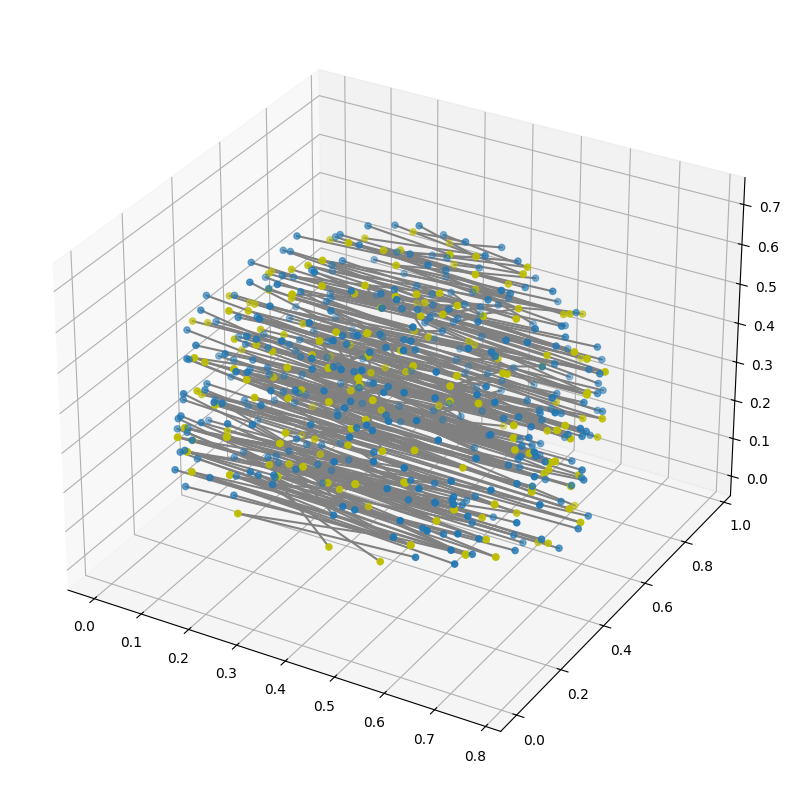

In [72]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(mapping_coordinates["x-cog_s"], mapping_coordinates["y-cog_s"], mapping_coordinates["z-cog_s"])
ax.scatter(mapping_coordinates["R_s"], mapping_coordinates["A_s"], mapping_coordinates["S_s"],c="y")
for i,row in mapping_coordinates.iterrows():
    ax.plot([row["R_s"], row["x-cog_s"]], [row["A_s"],row["y-cog_s"]],zs=[row["S_s"],row["z-cog_s"]],color="gray")
plt.show()

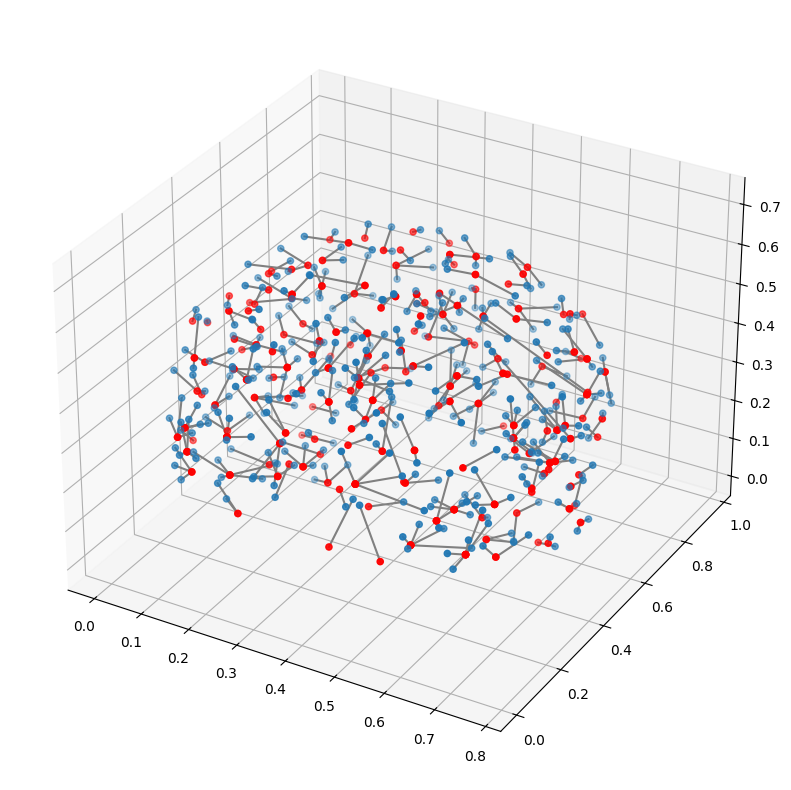

In [71]:
# flip x coordinate

mapping_coordinates["x-cog_s_flip"] = -mapping_coordinates["x-cog_s"]+mapping_coordinates["x-cog_s"].max()

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(mapping_coordinates["x-cog_s_flip"], mapping_coordinates["y-cog_s"], mapping_coordinates["z-cog_s"])
ax.scatter(mapping_coordinates["R_s"], mapping_coordinates["A_s"], mapping_coordinates["S_s"],c="r")
for i,row in mapping_coordinates.iterrows():
    ax.plot([row["R_s"], row["x-cog_s_flip"]], [row["A_s"],row["y-cog_s"]],zs=[row["S_s"],row["z-cog_s"]],color="gray")
plt.show()

In [63]:
glasser_centroids_array = np.zeros((360,3))
glasser_centroids_array[:,0] = glasser_centroids["x-cog"]
glasser_centroids_array[:,1] = glasser_centroids["y-cog"]
glasser_centroids_array[:,2] = glasser_centroids["z-cog"]


,n,r,CI95%,p-val,BF10,power
pearson,129600,1.0,"[1.0, 1.0]",0.0,nan,1


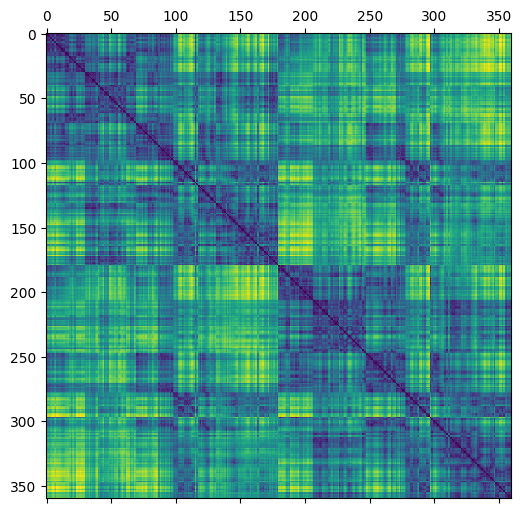

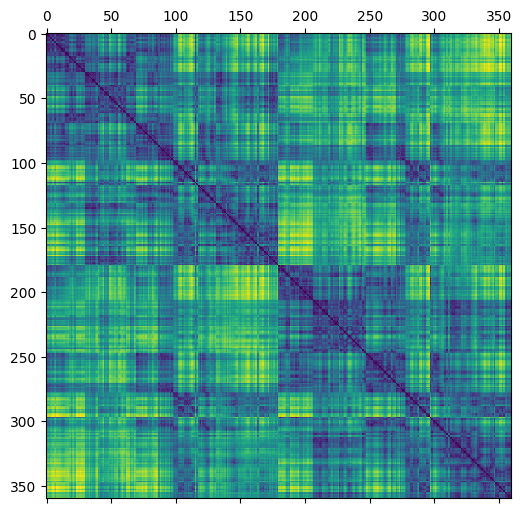

In [64]:
glasser_centroids_array = np.zeros((360,3))
glasser_centroids_array[:,0] = mapping_coordinates["x-cog"]
glasser_centroids_array[:,1] = mapping_coordinates["y-cog"]
glasser_centroids_array[:,2] = mapping_coordinates["z-cog"]

ED_glasser = centroids.roi_distances_from_centroids(glasser_centroids_array)

glasser_centroids_scaled_array = np.zeros((360,3))
glasser_centroids_scaled_array[:,0] = mapping_coordinates["x-cog_s_flip"]
glasser_centroids_scaled_array[:,1] = mapping_coordinates["y-cog_s"]
glasser_centroids_scaled_array[:,2] = mapping_coordinates["z-cog_s"]

ED_glasser_scaled_fliped = centroids.roi_distances_from_centroids(glasser_centroids_scaled_array)

plt.matshow(ED_glasser)
plt.matshow(ED_glasser_scaled_fliped)

pg.corr(ED_glasser.flatten(),ED_glasser_scaled_fliped.flatten())

In [90]:
ED_glasser_labels = list(mapping_coordinates["regionName"])
id_m1 = ED_glasser_labels.index("4_L")
ED_glasser_from_m1 = ED_glasser_scaled_fliped[id_m1]
mapping_coordinates["ED_glasser"] = ED_glasser_from_m1
mapping_coordinates

,regionName,Schaefer200,x-cog,y-cog,z-cog,color,x-cog_s,y-cog_s,z-cog_s,ROI Name,R,A,S,R_s,A_s,S_s,x-cog_s_flip,ED_glasser
0,V1_L,7Networks_LH_Vis_10,100.491589,41.138901,71.637040,b,0.445702,0.044836,0.273458,7Networks_LH_Vis_10,-12,-70,8,0.301205,0.156627,0.289157,0.327348,0.515624
1,V6_L,7Networks_LH_Vis_12,104.543112,44.481665,103.916749,b,0.469788,0.064708,0.465359,7Networks_LH_Vis_12,-12,-72,22,0.301205,0.144578,0.373494,0.303262,0.396905
2,DVT_L,7Networks_LH_Vis_12,108.042324,53.086307,103.566805,b,0.490591,0.115862,0.463278,7Networks_LH_Vis_12,-12,-72,22,0.301205,0.144578,0.373494,0.282459,0.346968
3,V2_L,7Networks_LH_Vis_13,102.236656,44.064791,74.401125,b,0.456077,0.062230,0.289890,7Networks_LH_Vis_13,-6,-88,28,0.337349,0.048193,0.409639,0.316974,0.490068
4,V3_L,7Networks_LH_Vis_13,107.926111,40.632159,76.961153,b,0.489900,0.041823,0.305109,7Networks_LH_Vis_13,-6,-88,28,0.337349,0.048193,0.409639,0.283150,0.490436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,Pir_R,7Networks_RH_SalVentAttn_FrOperIns_1,57.555081,133.362084,52.703672,b,0.190448,0.593097,0.160900,7Networks_RH_SalVentAttn_FrOperIns_1,40,6,-16,0.614458,0.614458,0.144578,0.582603,0.596369
356,PI_R,7Networks_RH_SalVentAttn_FrOperIns_1,47.013363,123.157016,57.926503,b,0.127778,0.532428,0.191950,7Networks_RH_SalVentAttn_FrOperIns_1,40,6,-16,0.614458,0.614458,0.144578,0.645273,0.602375
357,AVI_R,7Networks_RH_Cont_PFCv_1,58.445161,150.959140,67.720430,b,0.195739,0.697710,0.250174,7Networks_RH_Cont_PFCv_1,34,22,-8,0.578313,0.710843,0.192771,0.577311,0.571742
358,AAIC_R,7Networks_RH_Cont_PFCv_1,54.936552,141.408966,60.337241,b,0.174881,0.640935,0.206281,7Networks_RH_Cont_PFCv_1,34,22,-8,0.578313,0.710843,0.192771,0.598170,0.589606


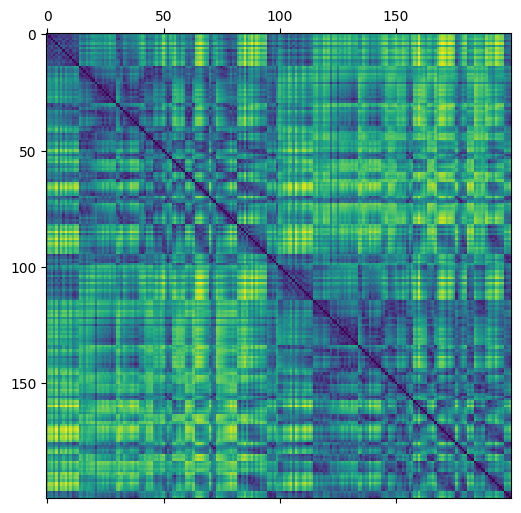

In [87]:
schaefer_centroids_array = np.zeros((200,3))
schaefer_centroids_array[:,0] = schaefer_centroids["R"]
schaefer_centroids_array[:,1] = schaefer_centroids["A"]
schaefer_centroids_array[:,2] = schaefer_centroids["S"]
schaefer_centroids_array

ED_schaefer = centroids.roi_distances_from_centroids(schaefer_centroids_array)
plt.matshow(ED_schaefer)

In [88]:
mapping_coordinates[mapping_coordinates["regionName"] == "4_L"]["Schaefer200"]

118    7Networks_LH_SomMot_15
Name: Schaefer200, dtype: object

In [89]:
ED_schaefer_labels = list(schaefer_centroids["ROI Name"])
id_m1 = ED_schaefer_labels.index("7Networks_LH_SomMot_15")
ED_schaefer_from_m1 = ED_schaefer[id_m1]
ED_schaefer_from_m1

array([ 81.60882305,  94.86832981,  93.18798206,  78.94301742,
       103.26664515,  69.77105417,  92.21713507,  80.72174428,
        89.55445271,  69.79971347,  84.47484833,  60.        ,
        67.70524352,  72.80109889,  86.74099377,  75.49834435,
        60.19966777,  81.3879598 ,  68.61486719,  67.6461381 ,
        53.96295025,  28.56571371,  45.29900661,  37.84177586,
        29.79932885,  29.79932885,  22.89104628,  27.27636339,
         0.        ,  16.24807681,  96.18731725,  90.06664199,
        52.07686627,  55.78530272,  40.44749683,  37.94733192,
        43.45112196,  38.67815921,  29.79932885,  26.15339366,
        41.37632173,  42.23742416,  69.45502142,  69.88562084,
        69.59885057,  64.03124237,  83.5463943 ,  84.8763807 ,
        72.91090453,  83.90470785,  84.89994111,  48.41487375,
        21.9089023 ,  30.06659276, 103.49879226, 109.79981785,
       112.19625662, 104.69001863, 111.08555262, 100.49875621,
        56.78027827,  46.08687449,  47.58150901,  98.16

In [92]:
schaefer_centroids["ED_schaefer"] = ED_schaefer_from_m1
schaefer_centroids

,ROI Name,R,A,S,R_s,A_s,S_s,ED_schaefer
ROI Label,,,,,,,,
1,7Networks_LH_Vis_1,-24,-54,-10,0.228916,0.253012,0.180723,81.608823
2,7Networks_LH_Vis_2,-26,-78,-14,0.216867,0.108434,0.156627,94.868330
3,7Networks_LH_Vis_3,-46,-70,-8,0.096386,0.156627,0.192771,93.187982
4,7Networks_LH_Vis_4,-10,-68,-4,0.313253,0.168675,0.216867,78.943017
5,7Networks_LH_Vis_5,-26,-96,-12,0.216867,0.000000,0.168675,103.266645
...,...,...,...,...,...,...,...,...
196,7Networks_RH_Default_PFCdPFCm_6,28,30,42,0.542169,0.759036,0.493976,73.783467
197,7Networks_RH_Default_PFCdPFCm_7,24,24,54,0.518072,0.722892,0.566265,63.749510
198,7Networks_RH_Default_pCunPCC_1,12,-54,14,0.445783,0.253012,0.325301,58.685603


In [93]:
merge = pd.merge(mapping_coordinates,schaefer_centroids,on="ROI Name")
merge

,regionName,Schaefer200,x-cog,y-cog,z-cog,color,x-cog_s,y-cog_s,z-cog_s,ROI Name,...,S_s_x,x-cog_s_flip,ED_glasser,R_y,A_y,S_y,R_s_y,A_s_y,S_s_y,ED_schaefer
0,V1_L,7Networks_LH_Vis_10,100.491589,41.138901,71.637040,b,0.445702,0.044836,0.273458,7Networks_LH_Vis_10,...,0.289157,0.327348,0.515624,-12,-70,8,0.301205,0.156627,0.289157,69.799713
1,V6_L,7Networks_LH_Vis_12,104.543112,44.481665,103.916749,b,0.469788,0.064708,0.465359,7Networks_LH_Vis_12,...,0.373494,0.303262,0.396905,-12,-72,22,0.301205,0.144578,0.373494,60.000000
2,DVT_L,7Networks_LH_Vis_12,108.042324,53.086307,103.566805,b,0.490591,0.115862,0.463278,7Networks_LH_Vis_12,...,0.373494,0.282459,0.346968,-12,-72,22,0.301205,0.144578,0.373494,60.000000
3,V2_L,7Networks_LH_Vis_13,102.236656,44.064791,74.401125,b,0.456077,0.062230,0.289890,7Networks_LH_Vis_13,...,0.409639,0.316974,0.490068,-6,-88,28,0.337349,0.048193,0.409639,67.705244
4,V3_L,7Networks_LH_Vis_13,107.926111,40.632159,76.961153,b,0.489900,0.041823,0.305109,7Networks_LH_Vis_13,...,0.409639,0.283150,0.490436,-6,-88,28,0.337349,0.048193,0.409639,67.705244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,Pir_R,7Networks_RH_SalVentAttn_FrOperIns_1,57.555081,133.362084,52.703672,b,0.190448,0.593097,0.160900,7Networks_RH_SalVentAttn_FrOperIns_1,...,0.144578,0.582603,0.596369,40,6,-16,0.614458,0.614458,0.144578,100.518655
356,PI_R,7Networks_RH_SalVentAttn_FrOperIns_1,47.013363,123.157016,57.926503,b,0.127778,0.532428,0.191950,7Networks_RH_SalVentAttn_FrOperIns_1,...,0.144578,0.645273,0.602375,40,6,-16,0.614458,0.614458,0.144578,100.518655
357,AVI_R,7Networks_RH_Cont_PFCv_1,58.445161,150.959140,67.720430,b,0.195739,0.697710,0.250174,7Networks_RH_Cont_PFCv_1,...,0.192771,0.577311,0.571742,34,22,-8,0.578313,0.710843,0.192771,99.176610
358,AAIC_R,7Networks_RH_Cont_PFCv_1,54.936552,141.408966,60.337241,b,0.174881,0.640935,0.206281,7Networks_RH_Cont_PFCv_1,...,0.192771,0.598170,0.589606,34,22,-8,0.578313,0.710843,0.192771,99.176610


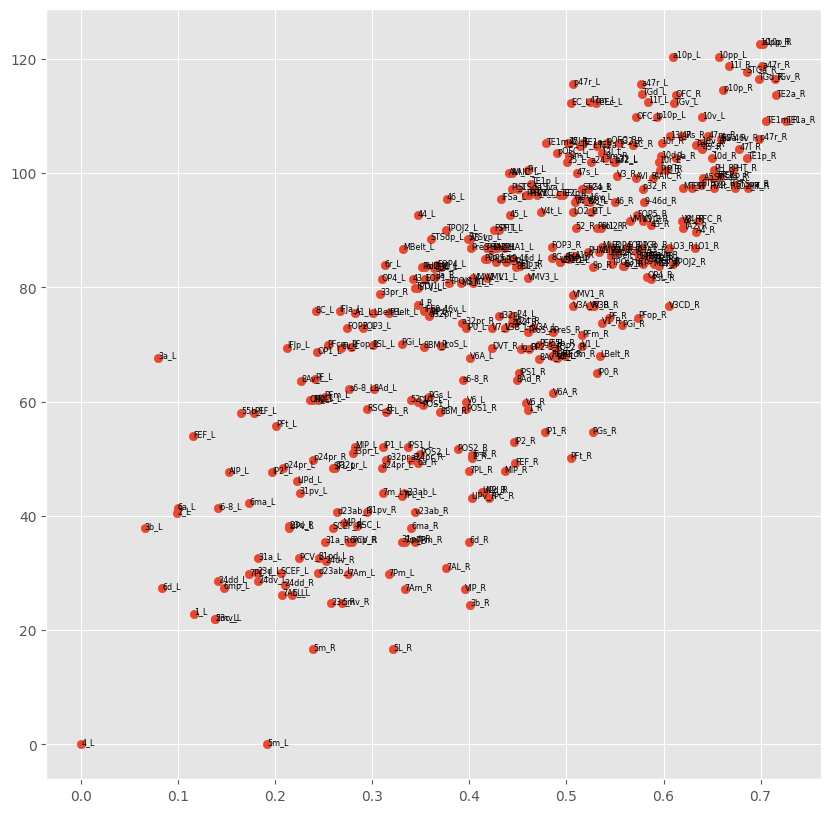

In [94]:
def minmax_norm(x):
    return (x - np.nanmin(x)) / (np.nanmax(x)-np.nanmin(x))

def plot_two_columns(df,col1,col2,label,normalize=True):
    if normalize:
        a1 = minmax_norm(np.array(df[col1]))
        a2 = minmax_norm(np.array(df[col2]))
    else:
        a1 = np.array(df[col1])
        a2 = np.array(df[col2])
        
    plt.style.use('ggplot')
    fig,ax = plt.subplots(figsize=(10,10))
    ax.scatter(a1,a2)

    for i, coor in enumerate(zip(a1,a2)):
        x,y = coor
        if np.isnan(x) or np.isnan(y):
            continue

        ax.text(x,y,df[label][i],fontsize='xx-small')

plot_two_columns(merge,"ED_glasser","ED_schaefer","regionName",normalize=False)
#plt.gca().set_aspect('equal')
plt.show()